In [1]:
import numpy as np
import pandas as pd
import time
import threading
import random as r
import psutil
import matplotlib.pyplot as plt

In [2]:
def generate_matrices(n, size):
    matrices = []
    for _ in range(n):
        matrices.append(np.random.rand(size, size))
    return matrices

def multiply_matrices(matrices):
    constant_matrix = np.random.rand(matrix_size, matrix_size)
    result = constant_matrix.copy()
    for matrix in matrices:
        result = np.dot(result, matrix)
    return result

def multiply_with_threads(num_threads, matrices):
    start_time = time.time()
    threads = []
    for i in range(0, len(matrices), num_threads):
        thread = threading.Thread(target=multiply_matrices, args=(matrices[i:i+num_threads],))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

In [3]:
num_matrices = 100
matrix_size = 1000
matrices=generate_matrices(num_matrices,matrix_size)

import multiprocessing
num_cores = multiprocessing.cpu_count()

In [4]:
results = {}
cpu_usages = {}
for num_threads in range(1, num_cores + 1):
    # Monitor CPU usage
    start_cpu_usage = psutil.cpu_percent()
    time_taken = multiply_with_threads(num_threads, matrices)
    end_cpu_usage = psutil.cpu_percent()
    
    results[num_threads] = time_taken
    cpu_usages[num_threads] = (start_cpu_usage + end_cpu_usage) / 2  # Average CPU usage during the operation

In [5]:
df = pd.DataFrame.from_dict(results, orient='index', columns=['Time Taken (s)'])
df['CPU Usage (%)'] = cpu_usages
df.index.name = 'Threads'

In [10]:
print("Time taken for matrix multiplication with varying number of threads and CPU usage:")
print(df)

Time taken for matrix multiplication with varying number of threads and CPU usage:
         Time Taken (s)  CPU Usage (%)
Threads                               
1              2.885028          51.25
2              2.205324         100.00
3              2.400678         100.00
4              2.392942          99.95
5              2.262474         100.00
6              2.610502          50.00


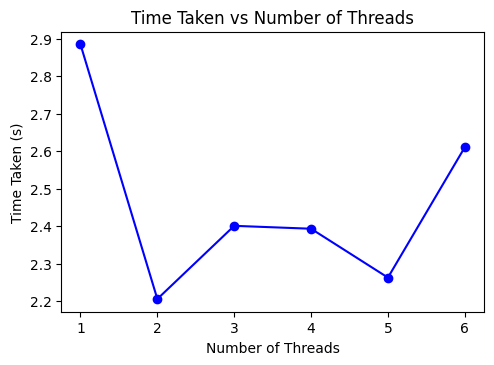

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(df_slice.index, df_slice['Time Taken (s)'], marker='o', color='b')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Number of Threads')

plt.show()